 #  E-Commerce Sales Analysis

This project analyzes retail sales data to uncover trends, customer behavior, and product performance using Python.

In [2]:
import pandas as pd 

## Step: Loading the Dataset

The dataset is stored locally in CSV format. To handle special characters in product descriptions, I used the `ISO-8859-1` encoding while reading the file into a pandas DataFrame.

This step ensures the data is loaded cleanly and ready for inspection.


In [2]:
# Loading the data
file_path = r"C:\Users\lizzy\OneDrive\Documents\PROJECT\Dataset for Project\data.csv"

# Reading the data with ISO-8859-1 encoding
df = pd.read_csv(file_path, encoding='ISO-8859-1')

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [3]:
print(df.tail())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  CustomerID Country  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France  


In [4]:
# Understanding the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Summary statistics for numeric columns in the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df.shape

(541909, 8)

In [8]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


## Step: Data Quality Check

Before performing any analysis, it’s important to assess the quality of the dataset. This step checks for:

- **Missing values** in each column
- **Invalid `Quantity` values** (less than or equal to 0), which may indicate returns or data entry errors
- **Invalid `UnitPrice` values** (less than or equal to 0), which may represent incorrect or promotional pricing

Identifying these issues early helps ensure the accuracy of later insights and guides data cleaning decisions.


In [9]:
# Check for missing values in each column
print("Missing values per column:\n")
print(df.isnull().sum())

# Check how many rows have Quantity <= 0
print("\nRow with Quantity <= 0:\n")
print(df[df['Quantity'] <= 0].shape)

# Check how many rows have UnitPrice <= 0
print("\nRows with UnitPrice <=0:\n")
print(df[df["UnitPrice"] <= 0].shape)

Missing values per column:

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Row with Quantity <= 0:

(10624, 8)

Rows with UnitPrice <=0:

(2517, 8)


##  Data Cleaning

Before analysis, the dataset must be cleaned to ensure accuracy and reliability. This includes:

- **Fixing data types** such as converting `InvoiceDate` to datetime
- **Removing invalid rows** where `Quantity` or `UnitPrice` is less than or equal to 0
- **Handling missing values**, especially in key columns like `CustomerID` and `Description`

These steps ensure that the insights derived from the dataset are based on valid and meaningful records.


In [10]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) 

In [11]:
# Confirm the change of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
# Remove rows where Quantity or UnitPrice is less than or equal to zero
df_cleaned = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()
# Confirm the new shape
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (541909, 8)
Cleaned shape: (530104, 8)


In [13]:
# Check how many CustomerID values are missing
print(df_cleaned['CustomerID'].isnull().sum())
# Convert CustomerID to string 
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('str')
# Fill missing values with unknown
df_cleaned['CustomerID'] =df_cleaned['CustomerID'].replace('nan', 'Unknown')

132220


In [14]:
# Check for missing values
print("Missing values:\n", df_cleaned.isnull().sum())

# Confirm no invalid Quantity or UnitPrice
print("Invalid Quantity rows:", df_cleaned[df_cleaned['Quantity'] <= 0].shape[0])
print("Invalid UnitPrice rows:", df_cleaned[df_cleaned['UnitPrice'] <= 0].shape[0])

# Confirm CustomerID cleanup
print("Missing CustomerIDs:", df_cleaned['CustomerID'].isnull().sum())
print("Unique CustomerIDs:", df_cleaned['CustomerID'].nunique())

Missing values:
 InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Invalid Quantity rows: 0
Invalid UnitPrice rows: 0
Missing CustomerIDs: 0
Unique CustomerIDs: 4339


In [15]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
# Showing the unique country in the data
df_cleaned['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

## Feature Engineering

To support time-based analysis and uncover temporal patterns in customer behavior, I created several new features from the `InvoiceDate` column:

- `Year`: Extracts the transaction year
- `Month`: Extracts the month (1 to 12)
- `Day`: Extracts the day of the month
- `Weekday`: Returns the day of the week (e.g., Monday, Tuesday)
- `Hour`: Extracts the hour of purchase (0–23)

These engineered features allow for more granular analysis of seasonal trends, weekly activity patterns, and peak transaction hours.

In [16]:
# Extract time-based features from InvoiceDate
df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['Weekday'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Hour'] = df_cleaned['InvoiceDate'].dt.hour

# Preview the new columns
df_cleaned[['InvoiceDate', 'Year', 'Month', 'Day', 'Weekday', 'Hour']].head()

,InvoiceDate,Year,Month,Day,Weekday,Hour
0,2010-12-01 08:26:00,2010,12,1,Wednesday,8
1,2010-12-01 08:26:00,2010,12,1,Wednesday,8
2,2010-12-01 08:26:00,2010,12,1,Wednesday,8
3,2010-12-01 08:26:00,2010,12,1,Wednesday,8
4,2010-12-01 08:26:00,2010,12,1,Wednesday,8


## Monthly Sales Trend

I grouped total revenue by `Year` and `Month` to understand how sales change over time. This analysis helps identify:

- **Seasonal patterns**, such as holiday peaks in November and December
- **Growth trends** across months and years
- **Low-performing periods** that may benefit from targeted marketing

I also created a `Period` column in `datetime` format to enable accurate time series plotting.

In [17]:
# Create Sales column: revenue = quantity * unit price
df_cleaned['Sales'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [18]:
# Monthly Sales Trend Analysis
# Group by Year and Month and calculate total sales
monthly_sales = df_cleaned.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a datetime Period column for plotting
monthly_sales['Period'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

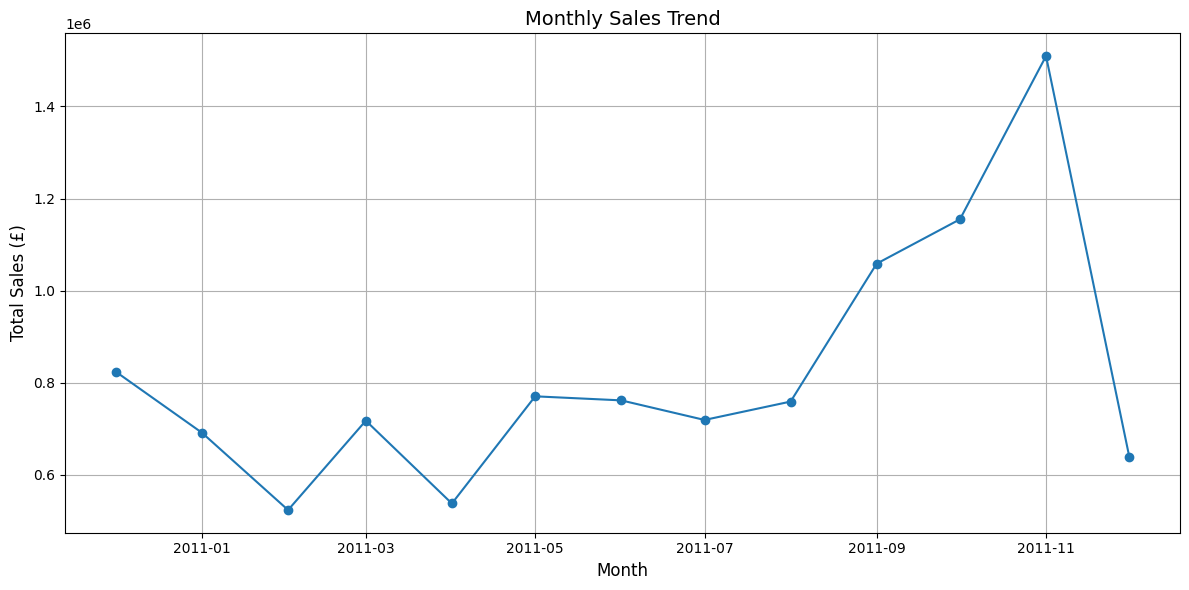

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Period'], monthly_sales['Sales'], marker='o')

plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (\u00A3)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

## Weekly Sales Trend

This analysis uses the' Weekday' column created earlier to explore how sales vary by day of the week. Grouping total sales by weekday helps to:

- Identify which days generate the **highest and lowest revenue**
- Understand **shopping behavior patterns** (e.g., do customers shop more on weekdays or weekends?)
- Optimize **marketing campaigns** and staffing for peak days

The results are visualized in a bar chart to compare total revenue across all seven days of the week.

In [20]:
# Weekly Sales Analysis 
# group by Weekday and sum total sales 
weekday_sales = df_cleaned.groupby('Weekday')['Sales'].sum().reset_index()

In [21]:
# Define the correct weekday order 
weekday_order =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

#Convert to a categorical type to preserve order in the chart
weekday_sales['Weekday'] = pd.Categorical(weekday_sales['Weekday'], categories=weekday_order, ordered=True)

# Sort the DataFrame
weekday_sales = weekday_sales.sort_values('Weekday')

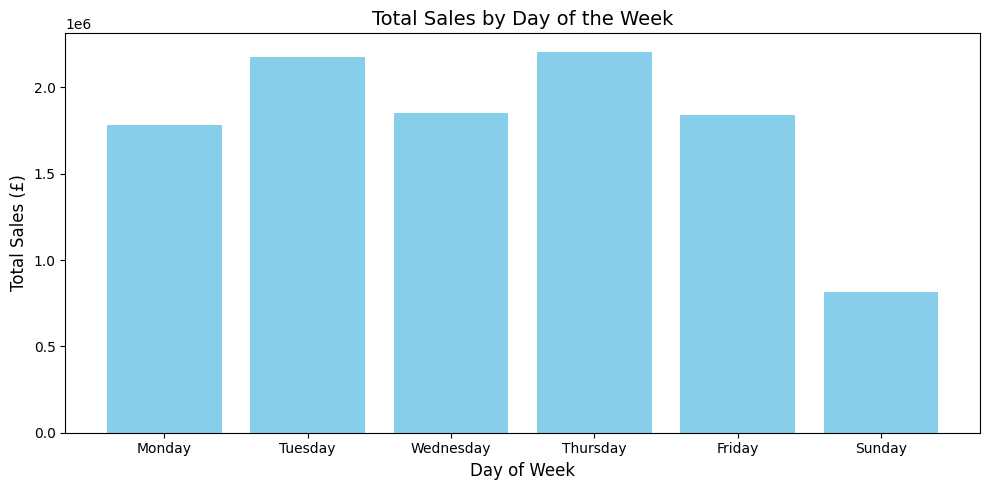

In [22]:
# Plot Weekly Sales 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(weekday_sales['Weekday'], weekday_sales['Sales'], color = 'skyblue')

plt.title('Total Sales by Day of the Week', fontsize=14)
plt.xlabel('Day of Week', fontsize=12) 
plt.ylabel('Total Sales (\u00A3)', fontsize=12) 
plt.tight_layout()
plt.show()

## Top-Selling Products

To identify which products contribute most to revenue, I grouped the dataset by `Description` and calculated each product's total Sales.

This analysis helps reveal:
- **Customer preferences** based on what they buy most
- The **best-performing products** in terms of revenue
- Opportunities to promote, bundle, or restock high-demand items

The top 10 products are visualized in a horizontal bar chart.

In [27]:
# Group by product description and sum total sales 
top_products = df_cleaned.groupby('Description')['Sales'].sum().reset_index()

# Sort by total Sales in descending order 
top_products = top_products.sort_values('Sales',ascending=False)

# View top 10 best selling products 
top_10_products = top_products.head(10)
print(top_10_products)

                             Description      Sales
1067                      DOTCOM POSTAGE  206248.77
2853            REGENCY CAKESTAND 3 TIER  174484.74
2387         PAPER CRAFT , LITTLE BIRDIE  168469.60
3844  WHITE HANGING HEART T-LIGHT HOLDER  106292.77
2413                       PARTY BUNTING   99504.33
1816             JUMBO BAG RED RETROSPOT   94340.05
2052      MEDIUM CERAMIC TOP STORAGE JAR   81700.92
2192                              Manual   78112.82
2692                             POSTAGE   78101.88
2741                  RABBIT NIGHT LIGHT   66964.99


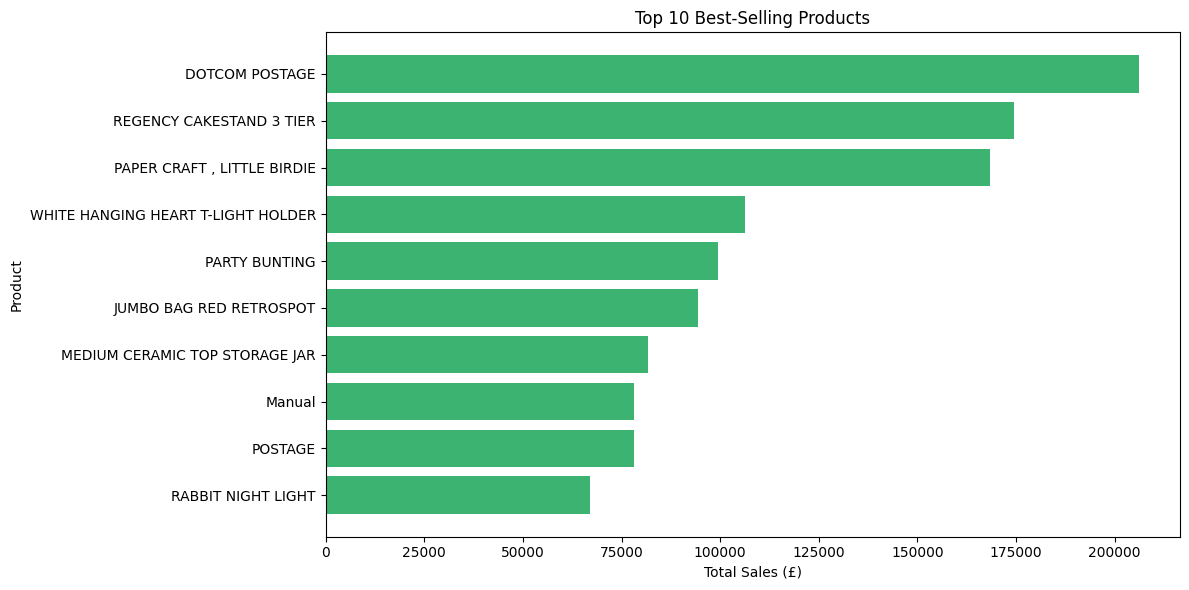

In [29]:
# Plot Top 10 Products 
plt.figure(figsize=(12, 6))
plt.barh(top_10_products['Description'][::-1], top_10_products['Sales'][::-1], color='mediumseagreen')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales (\u00A3)')  
plt.ylabel('Product')  
plt.tight_layout()
plt.show()

## Sales by Country

To understand the geographic distribution of revenue, I grouped total `Sales` by `Country`. This analysis highlights:

- **Top-performing countries** in terms of revenue
- Opportunities for **international market expansion**
- Regional demand patterns that may influence supply chain and marketing strategies

The bar chart below displays the top 10 countries by total sales.

In [32]:
# Group total sales by country and sort in descending order 
country_sales = df_cleaned.groupby('Country')['Sales'].sum().sort_values(ascending=False).reset_index()

# Preview top 10 countries
country_sales.head(10)

,Country,Sales
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


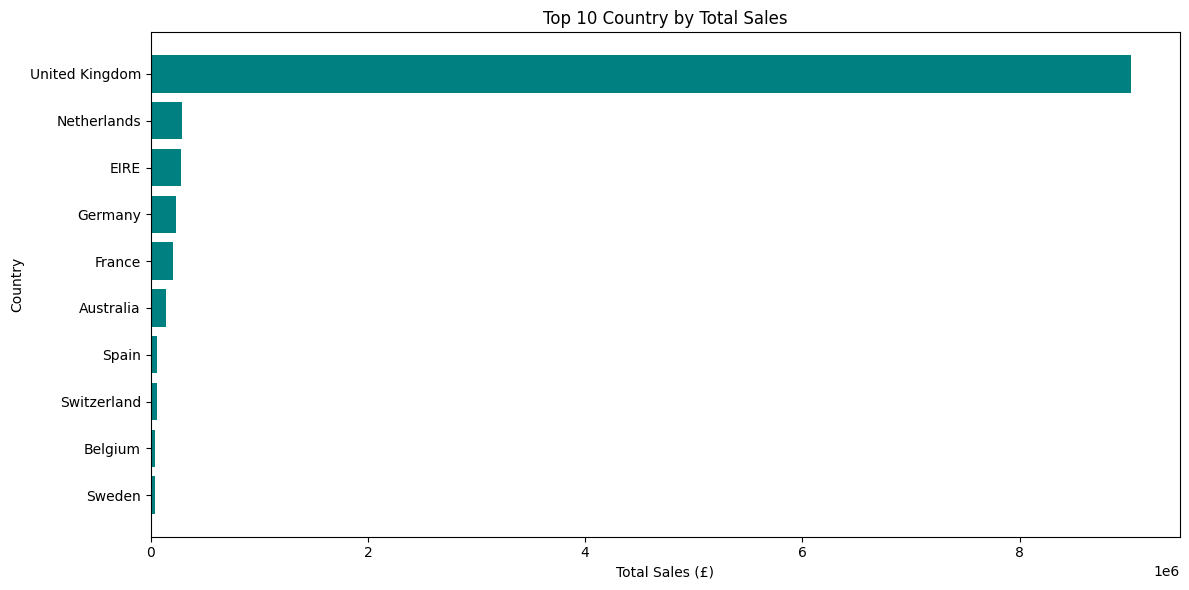

In [34]:
# Plot the top 10 countries  by total sales 
top_countries = country_sales.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_countries['Country'][::-1], top_countries['Sales'][::-1], color='teal')

plt.title('Top 10 Country by Total Sales')
plt.xlabel('Total Sales (\u00A3)')  
plt.ylabel('Country')  
plt.tight_layout()
plt.show()

## Customer Purchase Behavior

To understand customer engagement and value, I analyzed:

- **Total spend per customer**
- **Average spend per transaction**
- **Number of orders placed** (based on unique invoice counts)

This analysis provides insight into:
- Who the **highest-value customers** are
- How frequently customers return
- Opportunities for **customer retention programs**, loyalty rewards, or upselling

The merged dataset combines sales performance and order frequency for each customer.

In [36]:
# Number of transaction (invoices) per customer
orders_per_customer = df_cleaned.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
orders_per_customer.columns = ['CustomerID', 'TotalOrders']

#Preview
orders_per_customer.head()

,CustomerID,TotalOrders
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [40]:
# Total and average sales per customer
spend_per_customer = df_cleaned.groupby('CustomerID')['Sales'].agg(TotalSpend='sum',AverageSpend='mean').reset_index()

# Merge with order count 
customer_behavior = pd.merge(spend_per_customer, orders_per_customer, on='CustomerID')

# Preview final customer behavior summary 
customer_behavior.head(10)

,CustomerID,TotalSpend,AverageSpend,TotalOrders
0,12346.0,77183.60,77183.600000,1
1,12347.0,4310.00,23.681319,7
2,12348.0,1797.24,57.975484,4
3,12349.0,1757.55,24.076027,1
4,12350.0,334.40,19.670588,1
5,12352.0,2506.04,29.482824,8
6,12353.0,89.00,22.250000,1
7,12354.0,1079.40,18.610345,1
8,12355.0,459.40,35.338462,1
9,12356.0,2811.43,47.651356,3


## ✅ Final Summary: Sales & Customer Insights Project

This project explored retail sales data to uncover actionable insights across time trends, product performance, geographic markets, and customer behavior. After a thorough cleaning and preparation process, the following key findings emerged:

---

### 🔹 Time-Based Trends
- **Monthly Sales** peaked in **November**, suggesting a strong holiday season impact.
- **Weekday Sales** were highest between **Monday and Thursday**, while **Sunday** had the lowest volume.

---

### 🔹 Product-Level Insights
- Best-selling products included **DOTCOM POSTAGE** and **REGENCY CAKESTAND 3 TIER**.
- These items may benefit from focused marketing, bundling, or restocking priority.

---

### 🔹 Regional Performance
- The **United Kingdom** dominated sales, but countries like the **Netherlands**, **Germany**, and **France** also showed strong engagement.
- These regions offer opportunities for targeted expansion or tailored campaigns.

---

### 🔹 Customer Behavior
- Most customers made only **one purchase**, but a few placed **7–8 orders**, contributing significantly to revenue.
- **VIP customers** can be targeted for loyalty and retention strategies.

---

###  Next Steps
- Build interactive dashboards (e.g., with Power BI or Tableau)
- Predict customer churn or retention using machine learning
- Analyze returns, cancellations, and product lifecycle trends

---

### Created by **Theresa Adie**

